In [85]:
import spectral_processes as sp
import matplotlib.pyplot as plt
import numpy as np

In [71]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
peak6_datasets = sp.load(6)

1 Loaded spectroscopy_data/peaks_6\6_ (1).CSV:
2 Loaded spectroscopy_data/peaks_6\6_ (10).CSV:
3 Loaded spectroscopy_data/peaks_6\6_ (2).CSV:
4 Loaded spectroscopy_data/peaks_6\6_ (3).CSV:
5 Loaded spectroscopy_data/peaks_6\6_ (4).CSV:
6 Loaded spectroscopy_data/peaks_6\6_ (5).CSV:
7 Loaded spectroscopy_data/peaks_6\6_ (6).CSV:
8 Loaded spectroscopy_data/peaks_6\6_ (7).CSV:
9 Loaded spectroscopy_data/peaks_6\6_ (8).CSV:
10 Loaded spectroscopy_data/peaks_6\6_ (9).CSV:
11 Loaded spectroscopy_data/peaks_6\CS-BB-22.CSV:
12 Loaded spectroscopy_data/peaks_6\CS-BB-23.CSV:


In [73]:
x,y = sp.get_dataset(0, peak6_datasets)

In [74]:
#moving average
x,y = sp.move_ave(x=x, y=y, window_size=10)

In [75]:
xknots_indices, yknots = sp.get_knots(x=x, y=y,  npoints = 15, plotting=True)

the knots are at second indices: [ 1217  1570  3278  4705  6659  7372  8135 10643 11986 13319 14651 15772
 16385 17413 18648]
the knots are at yvals: [-1.200e-02 -4.000e-03  4.400e-02  6.400e-02  6.400e-02  2.000e-02
  3.600e-02 -4.000e-03 -4.200e-01 -2.036e+00 -3.840e+00 -4.232e+00
 -4.380e+00 -3.700e+00 -2.036e+00]


[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 583
    # data points      = 19991
    # variables        = 15
    chi-square         = 2871.13810
    reduced chi-square = 0.14372938
    Akaike info crit   = -38764.0082
    Bayesian info crit = -38645.4627
    R-squared          = 0.93717471
##  Warning: uncertainties could not be estimated:
    bkg_s8:   at boundary
    bkg_s11:  at boundary
    bkg_s12:  at boundary
    bkg_s13:  at boundary
    bkg_s14:  at boundary
[[Variables]]
    bkg_s0:   0.02208449 (init = -0.01133333)
    bkg_s1:   0.03119117 (init = -0.003333333)
    bkg_s2:   0.08100871 (init = 0.04466667)
    bkg_s3:   0.08704415 (init = 0.06533333)
    bkg_s4:   0.11759163 (init = 0.06466667)
    bkg_s5:   0.03490238 (init = 0.02133333)
    bkg_s6:   0.05553797 (init = 0.03666667)
    bkg_s7:   0.13855125 (init = -0.003333333)
    bkg_s8:  -0.21933333 (init = -0.4193333)
    bkg_s9:  -1.87751183

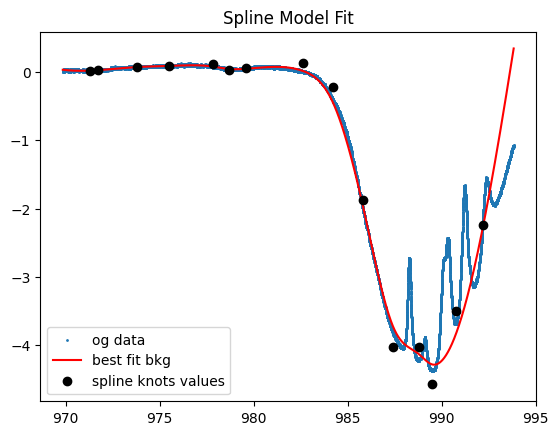

In [76]:
bkg = sp.spline_model(xknots_indices, x,y, plot=True)

In [77]:
left=987
right=993

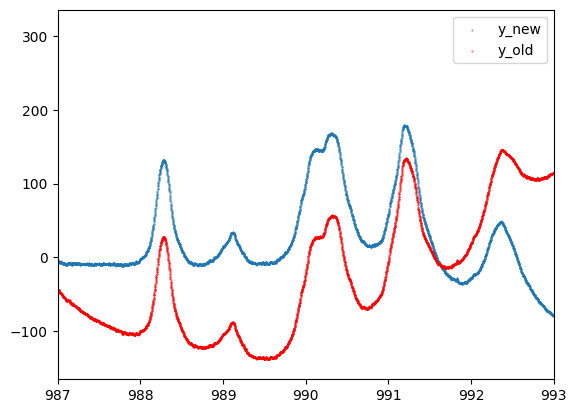

In [78]:
y = sp.subtract_bkg(bkg, y, x, plot_orientacne=True, left = left, right = right)

In [79]:
x,y = sp.cut_data(x=x,y=y,left=987, right=993)
x

array([987.    , 987.0012, 987.0024, ..., 992.9964, 992.9976, 992.9988])

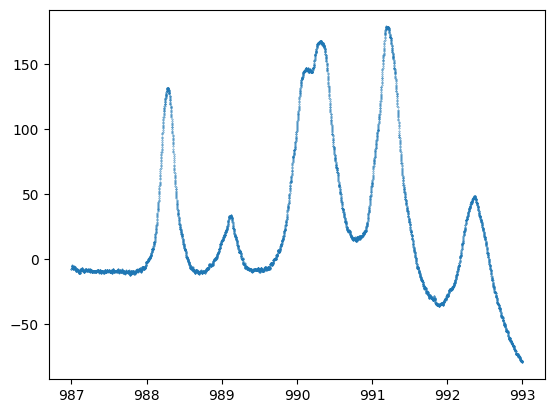

In [80]:
plt.scatter(x,y,s=0.1)

In [81]:
centers = [
    988.4,
    989,
    990.0,
    990.2,
    991.5,
    992.5
]
amplitudes = [
    80,
    20,80,80,80,80
]

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2622
    # data points      = 5000
    # variables        = 18
    chi-square         = 3263815.23
    reduced chi-square = 655.121484
    Akaike info crit   = 32442.0710
    Bayesian info crit = 32559.3805
    R-squared          = 0.80485763
[[Variables]]
    l0_amplitude:  32.4770794 +/- 0.84410378 (2.60%) (init = 80)
    l0_center:     988.279248 +/- 0.00185725 (0.00%) (init = 988.4)
    l0_sigma:      0.07167797 +/- 0.00263298 (3.67%) (init = 0.2)
    l0_fwhm:       0.14335593 +/- 0.00526597 (3.67%) == '2.0000000*l0_sigma'
    l0_height:     144.225298 +/- 3.73789966 (2.59%) == '0.3183099*l0_amplitude/max(1e-15, l0_sigma)'
    l1_amplitude:  3.83274987 +/- 0.60774761 (15.86%) (init = 

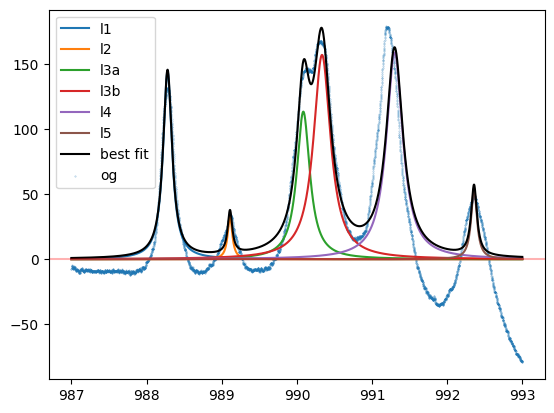

In [82]:
out = sp.model_peaks(peak_num = 6, centers=centers, x= x,y=y,plot=True, amplitudes = amplitudes)


l0_center   988.27925     0.00186
l1_center   989.10991     0.00582
l2_center   990.08545     0.00401
l3_center   990.33419     0.00381
l4_center   991.30000     0.00446
l5_center   992.35654     0.00399
[988.27924789 989.10990526 990.08544864 990.3341901  991.3
 992.35654214]


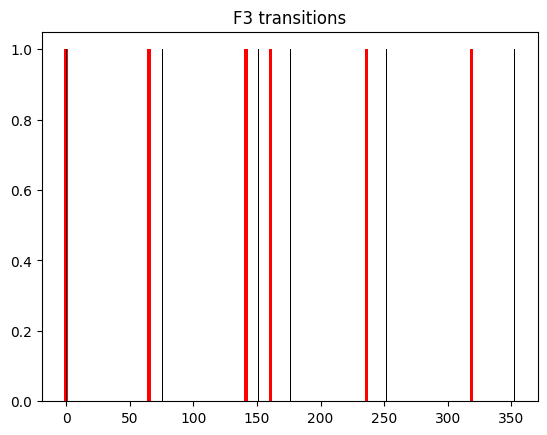

In [83]:
peaks = sp.eval_peaks(out)

In [147]:
cuts = np.zeros((12,2))
centers = np.zeros((12,6))
amplitudes = np.zeros((12,6))

In [148]:
def general(nth_data , npoints = 15, window_size = 10):
    global cuts
    global centers
    global amplitudes

    x,y = sp.get_dataset(nth_data, peak6_datasets)
    x,y = sp.move_ave(x=x, y=y, window_size=window_size)
    xknots_indices, yknots = sp.get_knots(x=x, y=y,  npoints = npoints, plotting=True)
    bkg = sp.spline_model(xknots_indices, x,y, plot=True)
    
    #get cutoffs
    if np.array(cuts[nth_data]).any() == 0:
        print('helpp')
        cuts[nth_data][0] = float(input('left cutoff?:'))
        cuts[nth_data][1] = float(input('right cutoff?:'))

    y = sp.subtract_bkg(bkg, y, x, plot_orientacne=True, left = cuts[nth_data][0], right = cuts[nth_data][1])
    x,y = sp.cut_data(x=x,y=y,left=cuts[nth_data][0], right=cuts[nth_data][1])

    #get centers
    if np.array(centers[nth_data]).any() == 0:
        for i in range(6):
            center = float(input(f'{i+1}nth peak at?:'))
            centers[nth_data][i] = center
    #get amplitudes
    if np.array(amplitudes[nth_data]).any() == 0:
        for i in range(6):
            amplitude = float(input(f'{i+1}nth amplitude ?:'))
            amplitudes[nth_data][i]  = amplitude
    else:
        amplitudes = amplitudes[nth_data]
    #eval
    out = sp.model_peaks(peak_num = 6, centers=centers[nth_data], x= x,y=y,plot=True, amplitudes = amplitudes[nth_data])
    peaks = sp.eval_peaks(out)



0
the knots are at second indices: [ 1217  1570  3278  4705  6659  7372  8135 10643 11986 13319 14651 15772
 16385 17413 18648]
the knots are at yvals: [-1.200e-02 -4.000e-03  4.400e-02  6.400e-02  6.400e-02  2.000e-02
  3.600e-02 -4.000e-03 -4.200e-01 -2.036e+00 -3.840e+00 -4.232e+00
 -4.380e+00 -3.700e+00 -2.036e+00]
[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 583
    # data points      = 19991
    # variables        = 15
    chi-square         = 2871.13810
    reduced chi-square = 0.14372938
    Akaike info crit   = -38764.0082
    Bayesian info crit = -38645.4627
    R-squared          = 0.93717471
##  Warning: uncertainties could not be estimated:
    bkg_s8:   at boundary
    bkg_s11:  at boundary
    bkg_s12:  at boundary
    bkg_s13:  at boundary
    bkg_s14:  at boundary
[[Variables]]
    bkg_s0:   0.02208449 (init = -0.01133333)
    bkg_s1:   0.03119117 (init = -0.003333333)
    bkg_s2:   0.0810

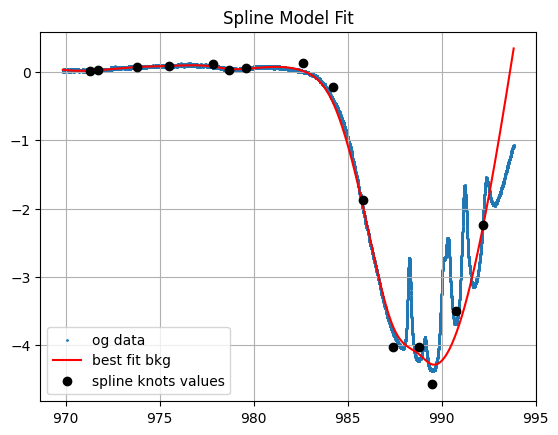

helpp


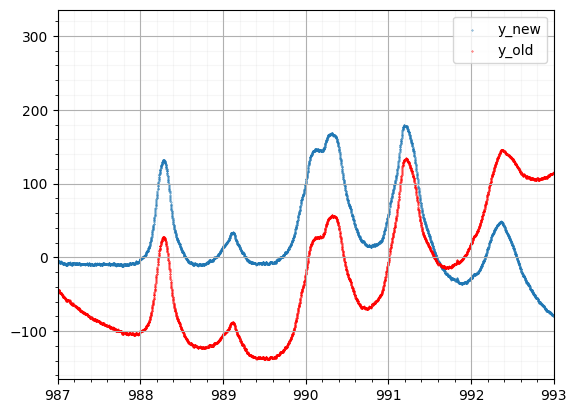

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 275
    # data points      = 5000
    # variables        = 18
    chi-square         = 2125875.54
    reduced chi-square = 426.711268
    Akaike info crit   = 30298.5055
    Bayesian info crit = 30415.8150
    R-squared          = 0.87289464
[[Variables]]
    l0_amplitude:  39.0516779 +/- 1.09202145 (2.80%) (init = 100)
    l0_center:     988.280974 +/- 0.00158751 (0.00%) (init = 988.3)
    l0_sigma:      0.08400794 +/- 0.00273410 (3.25%) (init = 0.2)
    l0_fwhm:       0.16801588 +/- 0.00546820 (3.25%) == '2.0000000*l0_sigma'
    l0_height:     147.968582 +/- 2.80516330 (1.90%) == '0.3183099*l0_amplitude/max(1e-15, l0_sigma)'
    l1_amplitude: -50.5753903 +/- 6.49287780 (12.84%) (init = 

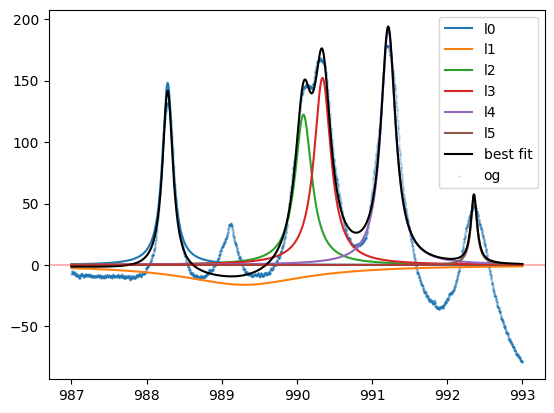

l0_center   988.28097     0.00159
l1_center   989.30000     0.03216
l2_center   990.08681     0.00421
l3_center   990.34084     0.00344
l4_center   991.21518     0.00145
l5_center   992.35551     0.00322
[988.28097413 989.3        990.08681012 990.34083702 991.21518466
 992.35551056]


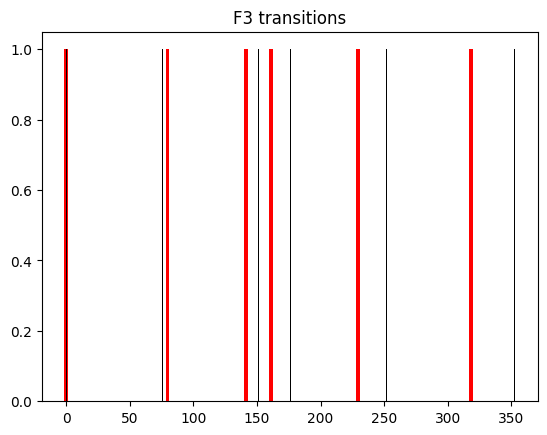

1
the knots are at second indices: [ 1316  2663  3992  5325  5559  7151  7996  9324 10658 12049 13408 14652
 16009 17431 19905]
the knots are at yvals: [-1.692 -2.692 -3.5   -4.288 -4.384 -4.028 -3.488 -1.8   -0.396  0.156
  0.316  0.32   0.38   0.38   0.332]
[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1712
    # data points      = 19991
    # variables        = 15
    chi-square         = 2428.34735
    reduced chi-square = 0.12156324
    Akaike info crit   = -42112.4524
    Bayesian info crit = -41993.9068
    R-squared          = 0.95590422
##  Warning: uncertainties could not be estimated:
    bkg_s1:   at boundary
    bkg_s2:   at boundary
    bkg_s3:   at boundary
    bkg_s4:   at boundary
    bkg_s5:   at boundary
[[Variables]]
    bkg_s0:  -1.76993341 (init = -1.690667)
    bkg_s1:  -2.49133333 (init = -2.691333)
    bkg_s2:  -3.29866667 (init = -3.498667)
    bkg_s3:  -4.08733333 (init = -4.28733

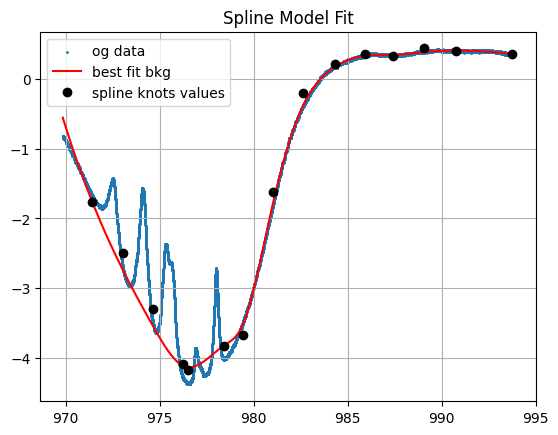

helpp


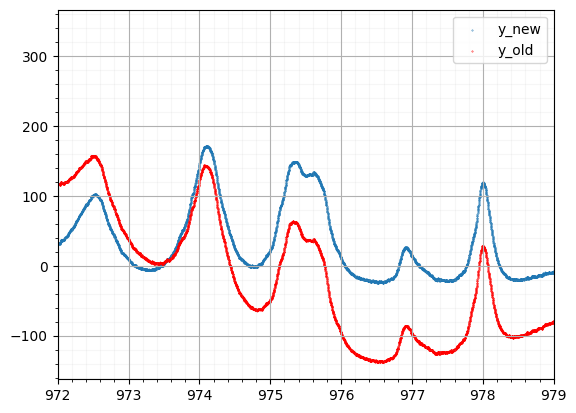

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 353
    # data points      = 5833
    # variables        = 18
    chi-square         = 1080161.12
    reduced chi-square = 185.754277
    Akaike info crit   = 30492.0415
    Bayesian info crit = 30612.1247
    R-squared          = 0.93673629
[[Variables]]
    l0_amplitude:  74.8881315 +/- 0.88503266 (1.18%) (init = 90)
    l0_center:     972.478677 +/- 0.00245393 (0.00%) (init = 972.6)
    l0_sigma:      0.22795917 +/- 0.00375915 (1.65%) (init = 0.2)
    l0_fwhm:       0.45591834 +/- 0.00751830 (1.65%) == '2.0000000*l0_sigma'
    l0_height:     104.569750 +/- 1.13273366 (1.08%) == '0.3183099*l0_amplitude/max(1e-15, l0_sigma)'
    l1_amplitude:  101.002071 +/- 0.78656206 (0.78%) (init = 80

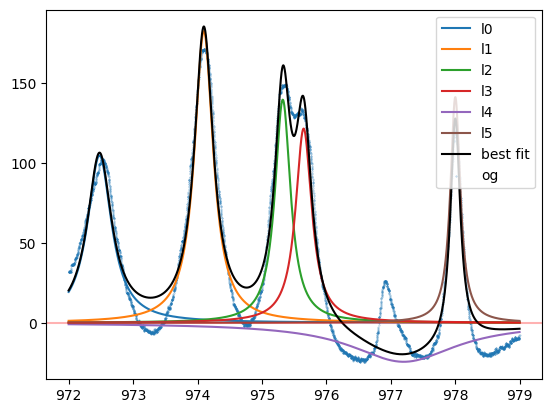

l0_center   972.47868     0.00245
l1_center   974.09828     0.00123
l2_center   975.32339     0.00208
l3_center   975.64734     0.00245
l4_center   977.20000     0.02310
l5_center   978.00121     0.00116
[972.47867709 974.0982804  975.32338794 975.64734097 977.2
 978.00121134]


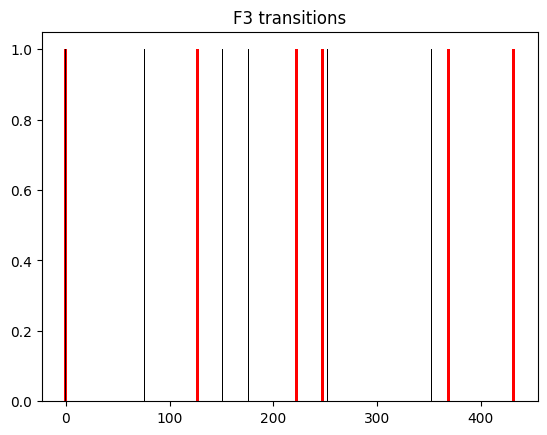

2
the knots are at second indices: [ 1199  2953  3379  5058  7798  9401 10964 12063 12840 14738 15751 17254
 18819 20388 21979]
the knots are at yvals: [-2.77555756e-17 -3.20000000e-02 -1.60000000e-02  3.20000000e-02
 -1.52000000e-01 -1.27200000e+00 -3.52000000e+00 -4.38400000e+00
 -4.44800000e+00 -3.52800000e+00 -2.87200000e+00 -1.48800000e+00
 -3.44000000e-01  1.04000000e-01  2.24000000e-01]
[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1888
    # data points      = 23519
    # variables        = 15
    chi-square         = 1573.86171
    reduced chi-square = 0.06696144
    Akaike info crit   = -63571.8748
    Bayesian info crit = -63450.8913
    R-squared          = 0.97161472
##  Warning: uncertainties could not be estimated:
    bkg_s4:   at boundary
    bkg_s5:   at boundary
    bkg_s9:   at boundary
    bkg_s10:  at boundary
    bkg_s11:  at boundary
    bkg_s12:  at boundary
[[Variables]]
    bkg_s0

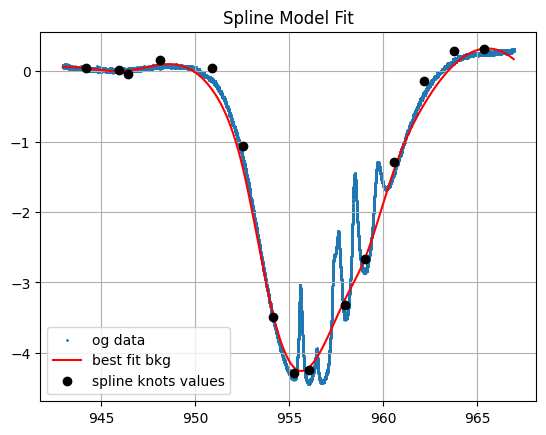

helpp


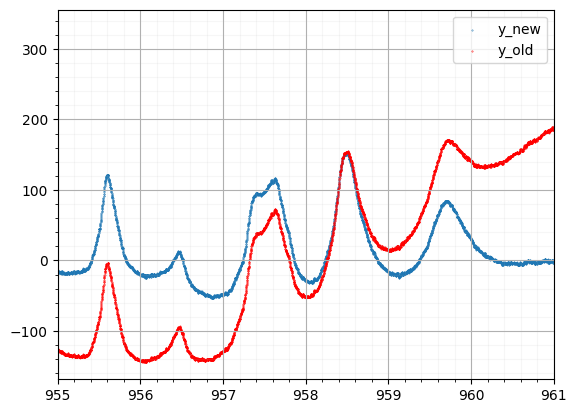

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1022
    # data points      = 5882
    # variables        = 18
    chi-square         = 1399345.18
    reduced chi-square = 238.633217
    Akaike info crit   = 32221.4972
    Bayesian info crit = 32341.7310
    R-squared          = 0.89431005
[[Variables]]
    l0_amplitude:  44.5167270 +/- 0.98448830 (2.21%) (init = 100)
    l0_center:     955.614982 +/- 0.00124150 (0.00%) (init = 955.5)
    l0_sigma:      0.09956555 +/- 0.00234795 (2.36%) (init = 0.2)
    l0_fwhm:       0.19913109 +/- 0.00469589 (2.36%) == '2.0000000*l0_sigma'
    l0_height:     142.319460 +/- 1.80990902 (1.27%) == '0.3183099*l0_amplitude/max(1e-15, l0_sigma)'
    l1_amplitude: -135.067393 +/- 4.85679140 (3.60%) (init = 

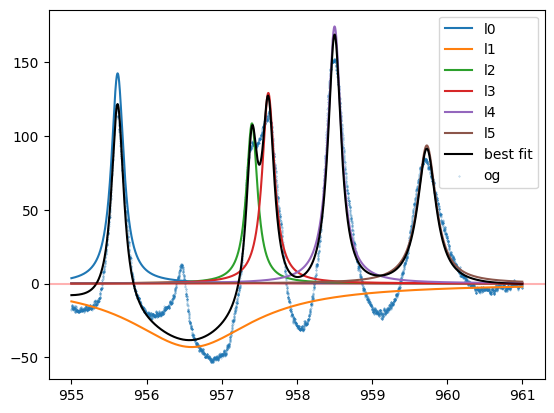

l0_center   955.61498     0.00124
l1_center   956.60000     0.09976
l2_center   957.40175     0.00203
l3_center   957.61967     0.00185
l4_center   958.50131     0.00105
l5_center   959.72811     0.00230
[955.61498248 956.6        957.40175003 957.61966519 958.50131292
 959.72811018]


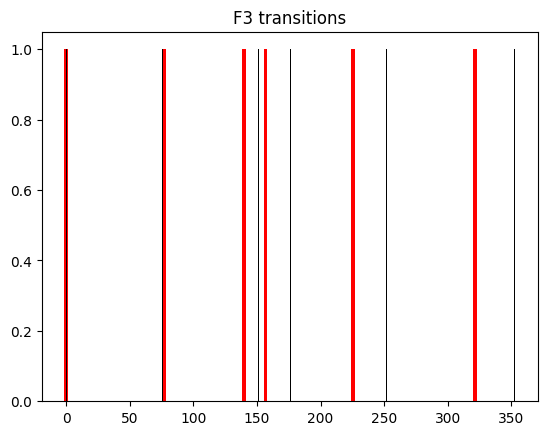

3
the knots are at second indices: [   70  2624  3734  5315  6656  7989  9309 10442 11790 11995 13489 14652
 15985 17316 18692]
the knots are at yvals: [ 0.08   0.104  0.036 -0.276 -0.98  -2.    -3.132 -3.576 -4.12  -4.048
 -3.836 -3.036 -1.328 -0.172  0.3  ]
[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 19991
    # variables        = 15
    chi-square         = 3121.52355
    reduced chi-square = 0.15626369
    Akaike info crit   = -37092.5068
    Bayesian info crit = -36973.9612
    R-squared          = 0.93071624
##  Warning: uncertainties could not be estimated:
    bkg_s0:   at initial value
    bkg_s1:   at initial value
    bkg_s2:   at initial value
    bkg_s3:   at initial value
    bkg_s4:   at initial value
    bkg_s5:   at initial value
    bkg_s6:   at initial value
    bkg_s7:   at initial value
    bkg_s8:   at initial value
    bkg_s9:   at initial value
    bkg_s

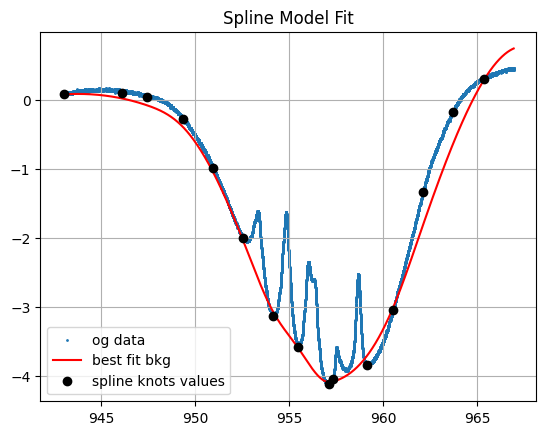

helpp


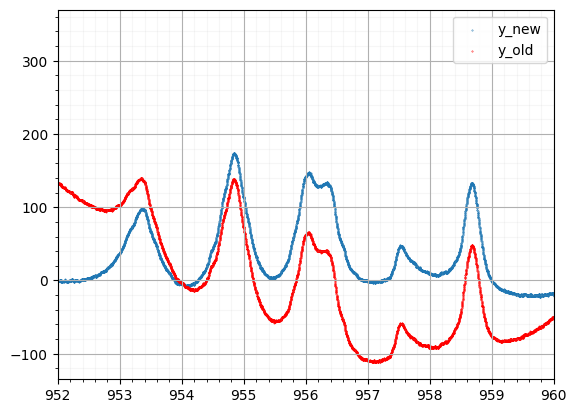

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 401
    # data points      = 6667
    # variables        = 18
    chi-square         = 984119.373
    reduced chi-square = 148.010133
    Akaike info crit   = 33334.8463
    Bayesian info crit = 33457.3350
    R-squared          = 0.93776612
[[Variables]]
    l0_amplitude:  61.5950295 +/- 0.67836072 (1.10%) (init = 80)
    l0_center:     953.323484 +/- 0.00211578 (0.00%) (init = 953.4)
    l0_sigma:      0.19658604 +/- 0.00304617 (1.55%) (init = 0.2)
    l0_fwhm:       0.39317209 +/- 0.00609234 (1.55%) == '2.0000000*l0_sigma'
    l0_height:     99.7339757 +/- 1.07447156 (1.08%) == '0.3183099*l0_amplitude/max(1e-15, l0_sigma)'
    l1_amplitude:  93.5361609 +/- 0.64316039 (0.69%) (init = 80

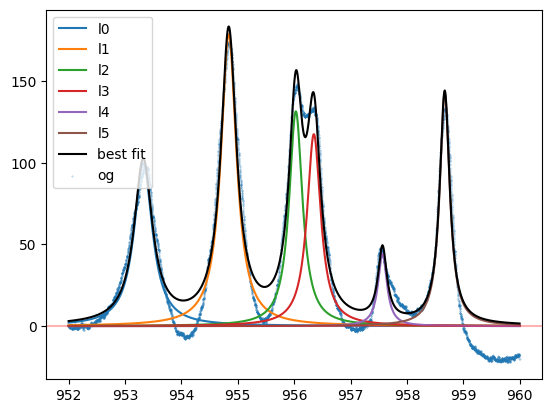

l0_center   953.32348     0.00212
l1_center   954.83929     0.00109
l2_center   956.02991     0.00190
l3_center   956.34973     0.00218
l4_center   957.56720     0.00329
l5_center   958.67144     0.00110
[953.32348397 954.83929241 956.02990696 956.34973452 957.56720063
 958.67143594]


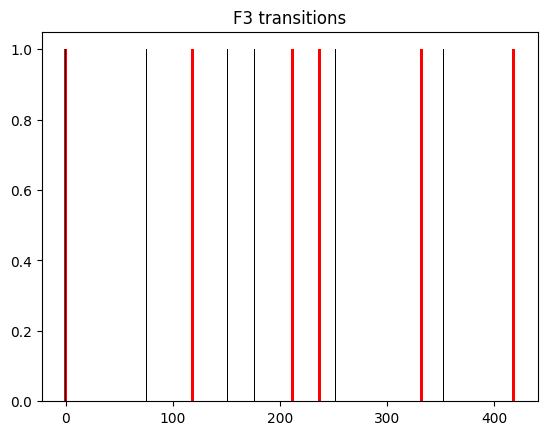

4
the knots are at second indices: [ 1261  2241  3396  5301  6659  7991  9296 10608 10659 12462 13404 14655
 16003 17459 19674]
the knots are at yvals: [ 0.092  0.084  0.072  0.012 -0.624 -2.476 -4.128 -4.44  -4.428 -3.068
 -1.856 -0.624  0.1    0.256  0.256]
[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2646
    # data points      = 19991
    # variables        = 15
    chi-square         = 1423.04044
    reduced chi-square = 0.07123751
    Akaike info crit   = -52795.9462
    Bayesian info crit = -52677.4007
    R-squared          = 0.96994539
##  Warning: uncertainties could not be estimated:
    bkg_s4:   at boundary
    bkg_s7:   at boundary
    bkg_s8:   at boundary
    bkg_s9:   at boundary
    bkg_s11:  at boundary
    bkg_s12:  at boundary
[[Variables]]
    bkg_s0:   0.12046184 (init = 0.09266667)
    bkg_s1:   0.10504374 (init = 0.08533333)
    bkg_s2:   0.04230587 (init = 0.07266667)
    bkg_s3: 

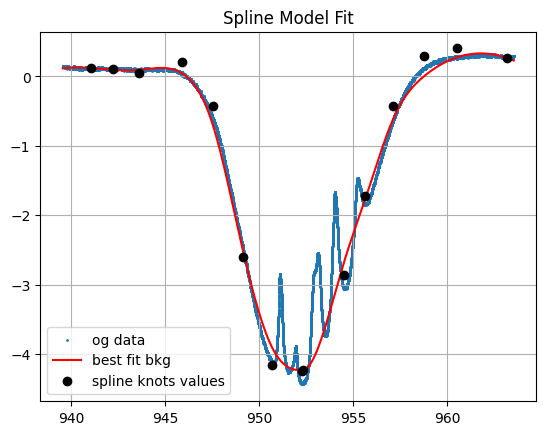

helpp


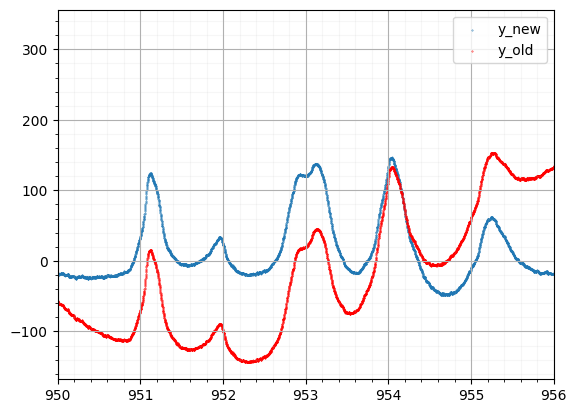

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 443
    # data points      = 5000
    # variables        = 18
    chi-square         = 2312669.33
    reduced chi-square = 464.205004
    Akaike info crit   = 30719.5989
    Bayesian info crit = 30836.9084
    R-squared          = 0.81151534
[[Variables]]
    l0_amplitude:  32.0134332 +/- 0.72591711 (2.27%) (init = 100)
    l0_center:     951.139426 +/- 0.00169086 (0.00%) (init = 951.1)
    l0_sigma:      0.07480263 +/- 0.00239762 (3.21%) (init = 0.2)
    l0_fwhm:       0.14960527 +/- 0.00479524 (3.21%) == '2.0000000*l0_sigma'
    l0_height:     136.227726 +/- 3.08022793 (2.26%) == '0.3183099*l0_amplitude/max(1e-15, l0_sigma)'
    l1_amplitude:  3.90898778 +/- 0.50202385 (12.84%) (init = 

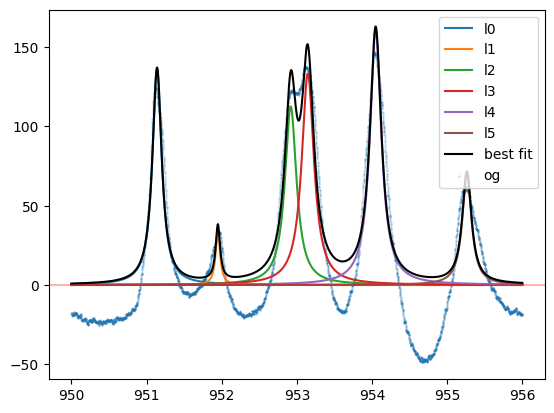

l0_center   951.13943     0.00169
l1_center   951.94866     0.00456
l2_center   952.91779     0.00294
l3_center   953.14559     0.00260
l4_center   954.04776     0.00160
l5_center   955.26141     0.00327
[951.13942573 951.94866347 952.91778959 953.14559373 954.0477553
 955.26140679]


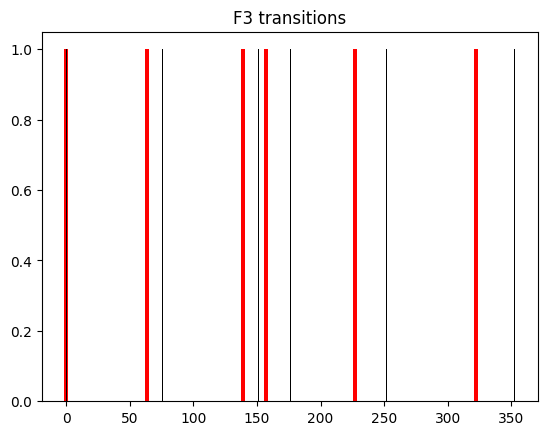

5
the knots are at second indices: [ 1325  2659  3995  5326  5977  6663  8324  9324 10662 12002 13343 14671
 17295 18647 19681]
the knots are at yvals: [-0.012 -0.34  -1.576 -3.64  -4.052 -4.008 -3.284 -2.66  -1.356 -0.3
  0.108  0.276  0.284  0.24   0.184]
[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1066
    # data points      = 19991
    # variables        = 15
    chi-square         = 1439.76789
    reduced chi-square = 0.07207488
    Akaike info crit   = -52562.3279
    Bayesian info crit = -52443.7824
    R-squared          = 0.96644144
##  Warning: uncertainties could not be estimated:
    bkg_s1:   at boundary
    bkg_s2:   at boundary
    bkg_s3:   at boundary
    bkg_s5:   at boundary
    bkg_s6:   at boundary
    bkg_s7:   at boundary
    bkg_s8:   at boundary
[[Variables]]
    bkg_s0:   0.08148779 (init = -0.01133333)
    bkg_s1:  -0.13866667 (init = -0.3386667)
    bkg_s2:  -1.37466667 (init =

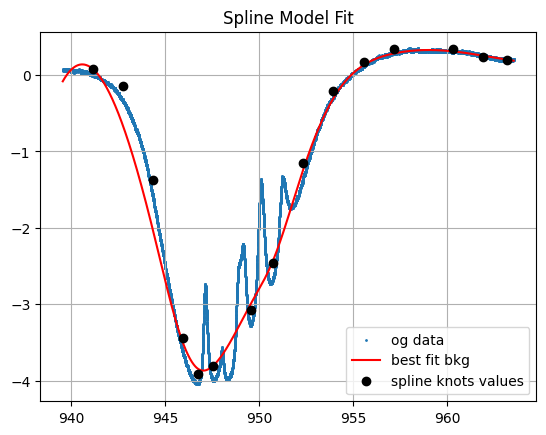

helpp


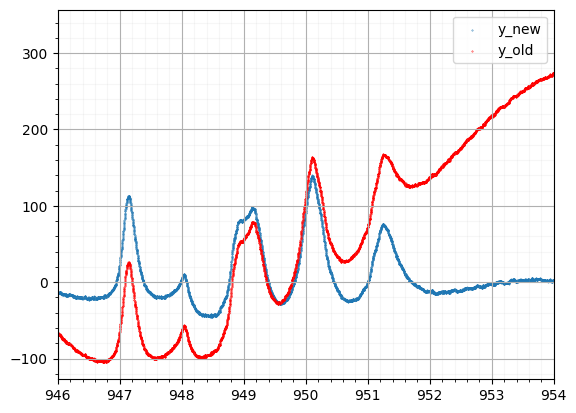

[[Model]]
    (((((Model(lorentzian, prefix='l0_') + Model(lorentzian, prefix='l1_')) + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(lorentzian, prefix='l5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38000
    # data points      = 6666
    # variables        = 18
    chi-square         = 10012909.9
    reduced chi-square = 1506.15372
    Akaike info crit   = 48795.1939
    Bayesian info crit = 48917.6799
    R-squared          = 6.6902e-05
##  Warning: uncertainties could not be estimated:
    l0_center:     at boundary
    l1_center:     at boundary
    l2_center:     at boundary
    l3_center:     at boundary
    l4_center:     at boundary
    l4_sigma:      at boundary
    l5_center:     at boundary
    l5_sigma:      at boundary
[[Variables]]
    l0_amplitude:  1533.51707 (init = 100)
    l0_center:     988.399999 (init = 988.2)
    l0_sigma:      10.0592485 (init = 0.2)
    l0_fw

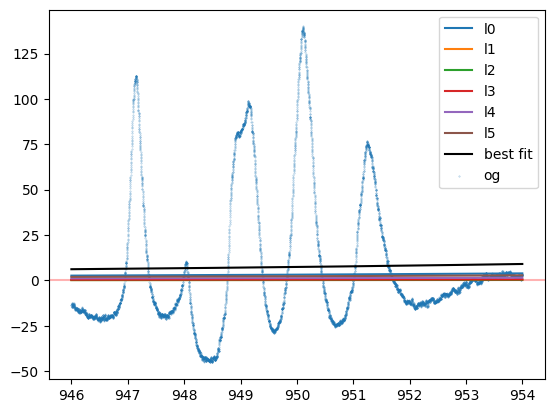

TypeError: unsupported format string passed to NoneType.__format__

In [149]:
peaks  = np.zeros(12 ,dtype=object)
for i,dataset in enumerate(peak6_datasets):
    print(i)
    peaks[i] = general(i)

In [134]:
if np.array(centers[1]).any() == 0:
    print('ejad')

ejad


In [150]:
centers

array([[988.3, 989.1, 990. , 990.3, 991.2, 992.4],
       [972.6, 974. , 975.3, 975.6, 977. , 978. ],
       [955.5, 956.4, 957.4, 957.6, 958.5, 959.8],
       [953.4, 954.8, 956. , 956.3, 957.5, 958.6],
       [951.1, 952. , 952.8, 953.1, 954. , 955.2],
       [988.2, 989.1, 990. , 990.3, 991.2, 992.5],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ]])

In [151]:
peak6_datasets[6]['']

,[s],CH1[V],CH2[V]
0,0.939560,-0.0048,0.8640
1,0.939560,-0.0040,0.9408
2,0.939562,-0.0048,0.8640
3,0.939562,-0.0044,0.9792
4,0.939565,-0.0048,0.8640
...,...,...,...
19995,0.963553,0.0048,0.8256
19996,0.963555,0.0032,0.7488
19997,0.963555,0.0048,0.8256
19998,0.963557,0.0032,0.7488
